<a href="https://colab.research.google.com/github/1dgog/tc3006c_portafoliodeimplementacion/blob/main/m2_sin_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework

## Conexión con google drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive" 
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
 acertados_test.pdf	 incorrectos_test.pdf	 scores_train.pdf
 acertados_train.pdf	 incorrectos_train.pdf	 scores_train.png
 acertados_valid.pdf	 incorrectos_valid.pdf	 scores_train.svg
'Colab Notebooks'	 iris.data		 scores_valid.pdf
'Documentos utiles'	 iris.names		'Servicio Social'
 EBSCO			 LiFE			'Sin ordenar'
 EGSGLP			'Plan de estudios'	 test.csv
 Fotos			 PlayDataset.csv	 train.csv
 gender_submission.csv	 Portugues		 Valhalla23.csv
 incorrectas_test.pdf	 real_estate.csv	 wine.data
 incorrectas_train.pdf	 real_state.csv		 wine.names
 incorrectas_valid.pdf	 scores_test.pdf


## Librerías

Se importan las librerías necesarias. sklearn solo se usa para hacer la división de datos de entrenamiento y prueba, y la matriz de confusión

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from google.colab import files

## Importacion de datos y columnas dummy

Se importa el CSV, se da nombre a las columnas, se forman columnas binarias dependiendo de clase ("index").

In [ ]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
df["clase1"] = df["index"]==1
df["clase1"] = df["clase1"].astype(int)
df["clase2"] = df["index"]==2
df["clase2"] = df["clase2"].astype(int)
df["clase3"] = df["index"]==3
df["clase3"] = df["clase3"].astype(int)
df

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,clase1,clase2,clase3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


## Visualización binaria de datos.

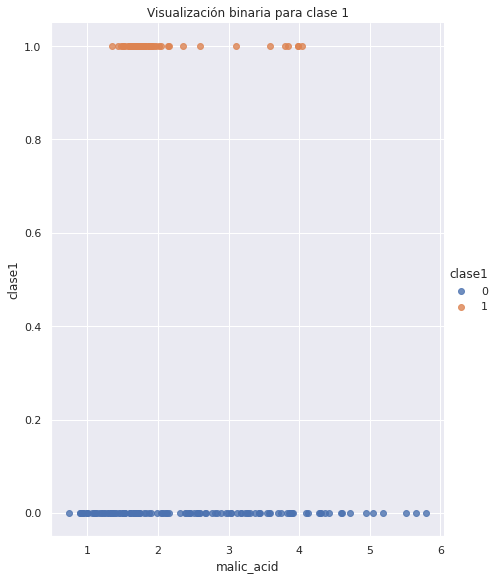

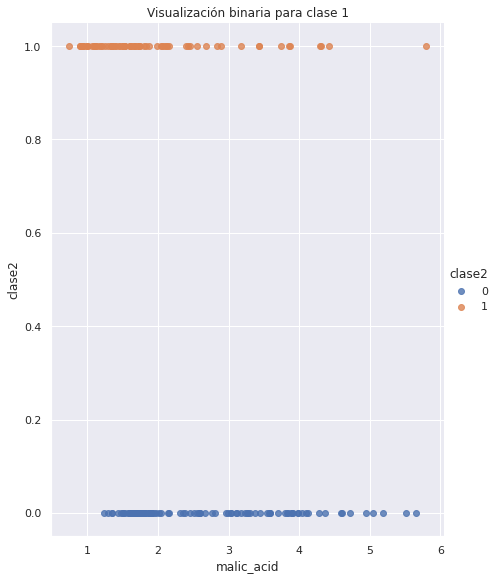

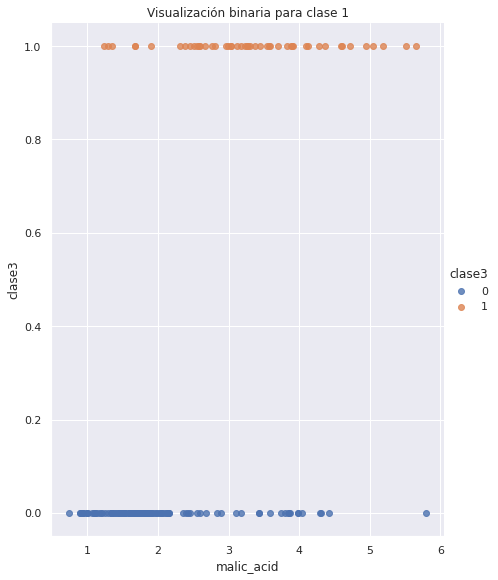

In [ ]:
sns.lmplot(x='malic_acid',
           y='clase1',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase1', 
           legend=True)
plt.title("Visualización binaria para clase 1")
plt.show()

sns.lmplot(x='malic_acid',
           y='clase2',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase2', 
           legend=True)
plt.title("Visualización binaria para clase 1")
plt.show()

sns.lmplot(x='malic_acid',
           y='clase3',
           height=8,
           aspect=.8,
           data = df,
           fit_reg=False, 
           hue='clase3', 
           legend=True)
plt.title("Visualización binaria para clase 1")
plt.show()

## Separación en subconjuntos y llamada a función de de clasificación

Se hace la división entre datos de entrenamiento, validación y prueba.

In [ ]:
print('-------------CLASE 1-----------------')

x_train1_a, x_r_a, y_train1_a, y_r_a = train_test_split(df["alcohol"], df['clase1'], test_size=0.33, random_state=0) ## el random state es semilla, se tomarán los mismos indices
x_valid1_a, x_test1_a, y_valid1_a, y_test1_a = train_test_split(x_r_a, y_r_a, random_state=0)
x_train1_b, x_r_b, y_train1_b, y_r_b = train_test_split(df["flavanoids"], df['clase1'], test_size=0.33, random_state=0)
x_valid1_b, x_test1_b, y_valid1_b, y_test1_b = train_test_split(x_r_b, y_r_b, random_state=0)
funcion_de_clasificacion2(x_train1_a, x_valid1_a, y_train1_a, y_valid1_a, x_train1_b, x_valid1_b, y_train1_b, y_valid1_b)

print('-------------CLASE 2-----------------')

x_train2_a, x_r_a, y_train2_a, y_r_a = train_test_split(df["alcohol"], df['clase2'], test_size=0.33, random_state=0)
x_valid2_a, x_test2_a, y_valid2_a, y_test2_a = train_test_split(x_r_a, y_r_a, random_state=0)
x_train2_b, x_r_b, y_train2_b, y_r_b = train_test_split(df["flavanoids"], df['clase2'], test_size=0.33, random_state=0)
x_valid2_b, x_test2_b, y_valid2_b, y_test2_b = train_test_split(x_r_b, y_r_b, random_state=0)
funcion_de_clasificacion2(x_train2_a, x_valid2_a, y_train2_a, y_valid2_a,x_train2_b, x_valid2_b, y_train2_b, y_valid2_b)

print('-------------CLASE 3-----------------')

x_train3_a, x_r_a, y_train3_a, y_r_a= train_test_split(df["alcohol"], df['clase3'], test_size=0.33, random_state=0)
x_valid3_a, x_test3_a, y_valid3_a, y_test3_a = train_test_split(x_r_a, y_r_a, random_state=0)
x_train3_b, x_r_b, y_train3_b, y_r_b = train_test_split(df["flavanoids"], df['clase3'], test_size=0.33, random_state=0)
x_valid3_b, x_test3_b, y_valid3_b, y_test2_b = train_test_split(x_r_b, y_r_b, random_state=0)
funcion_de_clasificacion2(x_train3_a, x_valid3_a, y_train3_a, y_valid3_a,x_train3_b, x_valid3_b, y_train3_b, y_valid3_b)

# esto se usará para hacer la evaluación de las matrices de confusión haciendo de multicaso y no binario.
x_train_multiclase, x_r_multiclase, y_train_multiclase, y_r_multiclase = train_test_split(df["alcohol"], df['index'], test_size=0.33, random_state=0)
x_valid_multiclase, x_test_multiclase, y_valid_multiclase, y_test_multiclase = train_test_split(x_r_multiclase, y_r_multiclase, random_state=0)

-------------CLASE 1-----------------
theta inicial 
 [2, 1, 0.5]
J valid
 -0.2559041133292006
J entrenamiento 
 -0.14583081150000177
theta 
 [-4.528507542373424, -0.21803268506952203, 2.8885166171144476]
-------------CLASE 2-----------------
theta inicial 
 [2, 1, 0.5]
J valid
 -0.23246988550365183
J entrenamiento 
 -0.23931472790761904
theta 
 [10.12620338472708, -0.8724596301387089, 0.3356779855872073]
-------------CLASE 3-----------------
theta inicial 
 [2, 1, 0.5]
J valid
 -0.05334605881054341
J entrenamiento 
 -0.06825375423790696
theta 
 [0.4640553251763694, 0.5079804326666967, -5.73272743121643]


## Función de clasificación

Se hace una función que considere dos características.

In [ ]:
def funcion_de_clasificacion2(x_train, x_valid, y_train, y_valid, x2_train, x2_valid, y2_train, y2_valid):
  
  # se hace una regresión logistica de orden 2

  h   = lambda x,theta,x2: 1/(1+np.exp(-(theta[0]+theta[1]*x+theta[2]*x2)))
  j_i = lambda x,y,theta,x2: y*np.log(h(x,theta,x2))+(1-y)*math.log(1-h(x,theta,x2))
  
  alpha = 0.05 ## es una proporcion de cuanto se mueve de acuerdo al error, porque era muy pequeño no se estaba moviendo prácticamente nada.

  n = len(y_train)

  theta = [2,1,0.5] # theta inicial
  print("theta inicial \n",theta)

  n_train = len(y_train)
  for idx in range(10000): ## Para mejorar aumentar el número de iteraciones
    acumDelta = []
    acumDeltaX = []
    acumDeltaX2 = []
    for x_i, y_i,x2_i in zip(x_train,y_train,x2_train):
      acumDelta.append(h(x_i,theta,x2_i)-y_i)
      acumDeltaX.append((h(x_i,theta,x2_i)-y_i)*x_i)
      acumDeltaX2.append((h(x_i,theta,x2_i)-y_i)*x2_i) # Acumular para el nuevo theta
      
    sJt0 = sum(acumDelta)
    sJt1 = sum(acumDeltaX)
    sJt2 = sum(acumDeltaX2)
    theta[0] = theta[0]-alpha/n*sJt0
    theta[1] = theta[1]-alpha/n*sJt1
    theta[2] = theta[2]-alpha/n_train*sJt2
  
  n_validate = len(y_valid)

  # Validación

  acumDelta = []
  for x_i, y_i,x2_i in zip(x_valid,y_valid,x2_valid):
    acumDelta.append(j_i(x_i,y_i,theta,x2_i))  

  sDelta = sum(acumDelta)
  J_validate = 1/(2*n_validate)*sDelta

  # Training
  
  acumDelta = []
  for x_i, y_i,x2_i in zip(x_train,y_train,x2_train):
    acumDelta.append(j_i(x_i,y_i,theta,x2_i)) 

  sDelta = sum(acumDelta)
  J_train = 1/(2*n_train)*sDelta

  print("J valid\n", J_validate)
  print("J entrenamiento \n",J_train)
  print("theta \n",theta)

## Predicciones

Las variables maxValueIndex, toman la columna con el valor mayor del dataframe formado por los arrays comparacion1, comparacion2 y comparacion3 (que toman el valor de las características y theta para la regresión logistica). Este se usa para después hacer la matriz de confusión multicaso.

In [ ]:
# Se ponen las thetas recuperadas de el print de más arriba

#theta1 = [1.08516333425868, -0.6069427929053786, 2.669538458921063]; theta2 = [10.12620338472708, -0.8724596301387089, 0.3356779855872073]; theta3 = [1.70989168018572, 0.1985467996673931, -3.4967511269383458];

theta1 = [-4.528507542373424, -0.21803268506952203, 2.8885166171144476]; theta2 = [2.8906413582208326, -0.3023842108514869, 0.23510670042415469]; theta3 = [0.4640553251763694, 0.5079804326666967, -5.73272743121643];

## ----------------------------PARA CLASE 1--------------------------------------------##

## ----------------------------TRAIN--------------------------------------------##

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_train1_a+theta1[2]*x_train1_b))))
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_train1_a+theta2[2]*x_train1_b))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_train1_a+theta3[2]*x_train1_b))))

comparacion_train = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_train = pd.DataFrame(comparacion_train)

maxValueIndex_train_1 = df2_train.idxmax(axis = 1).astype(int)
print(maxValueIndex_train_1)

## ----------------------------VALID--------------------------------------------##

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_valid1_a+theta1[2]*x_valid1_b))))
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_valid1_a+theta2[2]*x_valid1_b))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_valid1_a+theta3[2]*x_valid1_b))))

comparacion_valid = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_valid = pd.DataFrame(comparacion_valid)

maxValueIndex_valid_1 = df2_valid.idxmax(axis = 1).astype(int)
print(maxValueIndex_valid_1)

## ----------------------------TEST--------------------------------------------##

comparacion1 = np.array(1/(1+np.exp(-(theta1[0]+theta1[1]*x_test1_a+theta1[2]*x_test1_b))))
comparacion2 = np.array(1/(1+np.exp(-(theta2[0]+theta2[1]*x_test1_a+theta2[2]*x_test1_b))))
comparacion3 = np.array(1/(1+np.exp(-(theta3[0]+theta3[1]*x_test1_a+theta3[2]*x_test1_b))))

comparacion_test = {'1': comparacion1.transpose(),'2': comparacion2.transpose(),'3': comparacion3.transpose()}

df2_test = pd.DataFrame(comparacion_test)

maxValueIndex_test_1 = df2_test.idxmax(axis = 1).astype(int)
print(maxValueIndex_test_1)

0      3
1      3
2      2
3      2
4      3
      ..
114    2
115    2
116    2
117    1
118    3
Length: 119, dtype: int64
0     2
1     3
2     3
3     3
4     2
5     1
6     3
7     2
8     3
9     2
10    2
11    2
12    2
13    1
14    1
15    1
16    3
17    1
18    3
19    2
20    1
21    2
22    1
23    1
24    3
25    1
26    2
27    2
28    1
29    1
30    3
31    1
32    2
33    3
34    1
35    1
36    2
37    3
38    1
39    1
40    1
41    3
42    2
43    2
dtype: int64
0     1
1     1
2     2
3     2
4     3
5     1
6     1
7     3
8     1
9     1
10    1
11    3
12    1
13    1
14    1
dtype: int64


## Visualización de predicciones (conjunto de prueba) para README.md

In [ ]:
visualizacion_predicciones = pd.concat([df2_test, 
                                        pd.DataFrame(np.asarray(y_test_multiclase)), 
                                        pd.DataFrame(np.asarray(maxValueIndex_test_1))], 
                                       axis=1)
visualizacion_predicciones.columns = ["1","2","3","Real","Prediccion"]
visualizacion_predicciones

,1,2,3,Real,Prediccion
0,0.865317,0.468191,0.000013,2,1
1,0.784437,0.413345,0.000041,1,1
2,0.033982,0.354423,0.282539,2,2
3,0.226377,0.453106,0.005489,2,2
4,0.001396,0.226792,0.996188,3,3
5,0.849263,0.469782,0.000016,2,1
6,0.699695,0.290471,0.000113,1,1
7,0.004636,0.317729,0.956103,3,3
8,0.516764,0.359412,0.000480,1,1
9,0.587793,0.382137,0.000266,1,1


## Matriz de confusión

Se presenta la matriz de confusión con base en los valores obtenidos de las pruebas. Se obtiene usando la librería de sklearn importada más arriba.

In [ ]:
print("Matriz de confusión para entrenamiento")
cf_train = confusion_matrix(y_train_multiclase, maxValueIndex_train_1)
print(cf_train)
print("Matriz de confusión para validacion")
cf_valid = confusion_matrix(y_valid_multiclase, maxValueIndex_valid_1)
print(cf_valid)
print("Matriz de confusión para prueba")
cf_test = confusion_matrix(y_test_multiclase,maxValueIndex_test_1)
print(cf_test)

Matriz de confusión para entrenamiento
[[36  3  0]
 [12 30  5]
 [ 0  2 31]]
Matriz de confusión para validacion
[[13  0  0]
 [ 4 14  1]
 [ 0  1 11]]
Matriz de confusión para prueba
[[7 0 0]
 [3 2 0]
 [0 0 3]]


### Visualización de matrices de confusión con sns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

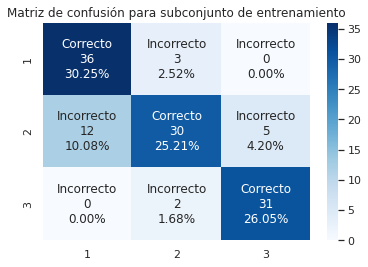

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

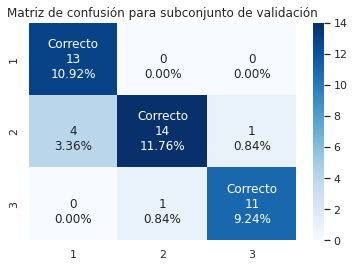

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

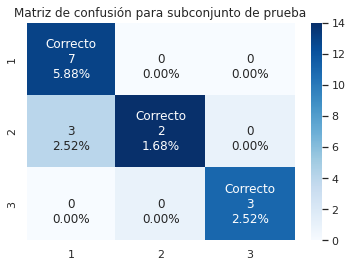

In [ ]:
# para que las columnas y filas vayan de 1 a 3 y no 0 a 2
df_cf_train = pd.DataFrame(cf_train, index = [1, 2, 3],
                  columns = [1, 2, 3])
df_cf_valid = pd.DataFrame(cf_valid, index = [1, 2, 3],
                  columns = [1, 2, 3])
df_cf_test = pd.DataFrame(cf_valid, index = [1, 2, 3],
                  columns = [1, 2, 3])

group_names = ["Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto","Incorrecto","Incorrecto","Incorrecto","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_train.flatten()/np.sum(cf_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_train,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para subconjunto de entrenamiento")
plt.savefig('cf_train.png') 
files.download("cf_train.png")
plt.show()

group_names = ["Correcto"," "," "," ","Correcto"," "," "," ","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_valid.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_valid.flatten()/np.sum(cf_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_valid,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para subconjunto de validación")
plt.savefig('cf_valid.png') 
files.download("cf_valid.png")
plt.show()

group_names = ["Correcto"," "," "," ","Correcto"," "," "," ","Correcto"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_test.flatten()/np.sum(cf_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)
sns.heatmap(df_cf_test,annot=labels, fmt="", cmap='Blues')
plt.title("Matriz de confusión para subconjunto de prueba")
plt.savefig('cf_test.png') 
files.download("cf_test.png")
plt.show()